# Expectation-maximisation algorithm

## Exercise 1

Recreate the step-by-step example from the lab so that the algorithm also estimates the variance $\sigma^2$. 

The maximisation step for $\sigma^2_j$ is

$$ \sigma^2_j \leftarrow \frac{\sum_{i=1}^{m}E[z_{ij}](x_i-\mu_j)^2}{\sum_{i=1}^{m}E[z_{ij}]} $$

Use the same data, same starting hypothesis and perform at least 3 iterations.

## Exercise 2

Recreate the step-by-step example from the lab, but also using the fact that $\mu_1=\mu_2-8$.

Use the same data, same starting hypothesis and perform at least 3 iterations.

## Exercise 3

Recreate the step-by-step example from the lab, but instead of the means, estimate the variations, while the means are fixed at $\mu_1 = \mu_2 = 15$.

The maximisation step for $\sigma^2_j$ is

$$ \sigma^2_j \leftarrow \frac{\sum_{i=1}^{m}E[z_{ij}](x_i-\mu_j)^2}{\sum_{i=1}^{m}E[z_{ij}]} $$

Use the same data, same starting hypothesis and perform at least 3 iterations.

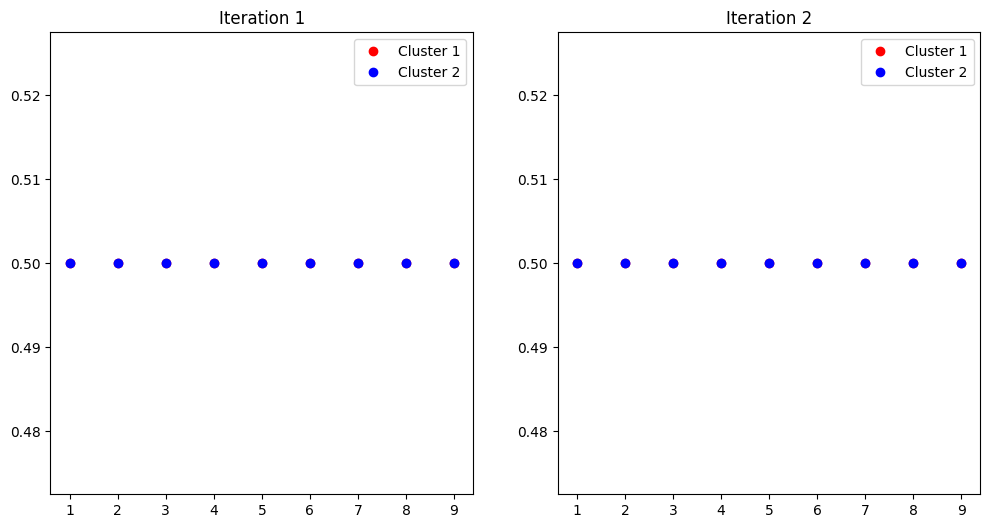

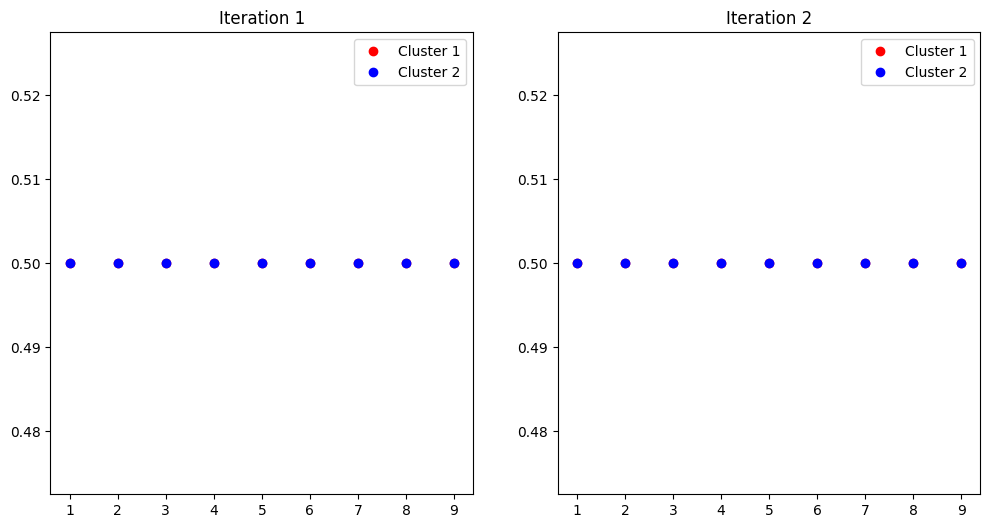

In [1]:
"""
## Exercise 3

Recreate the step-by-step example from the lab, but instead of the means, estimate the variations, while the means are fixed at $\mu_1 = \mu_2 = 15$.

The maximisation step for $\sigma^2_j$ is

$$ \sigma^2_j \leftarrow \frac{\sum_{i=1}^{m}E[z_{ij}](x_i-\mu_j)^2}{\sum_{i=1}^{m}E[z_{ij}]} $$

Use the same data, same starting hypothesis and perform at least 3 iterations.
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Data
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
m = len(x)

# Initial hypothesis
mu1 = 15
mu2 = 15
sigma1 = 1
sigma2 = 1
pi1 = 0.5
pi2 = 0.5

# E-step
z1 = pi1 * norm.pdf(x, mu1, sigma1)
z2 = pi2 * norm.pdf(x, mu2, sigma2)
z = np.array([z1, z2])
z /= z.sum(axis=0)

# M-step
mu1 = (z[0] * x).sum() / z[0].sum()
mu2 = (z[1] * x).sum() / z[1].sum()

sigma1 = (z[0] * (x - mu1)**2).sum() / z[0].sum()
sigma2 = (z[1] * (x - mu2)**2).sum() / z[1].sum()

pi1 = z[0].sum() / m
pi2 = z[1].sum() / m

# Plot
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title('Iteration 1')
plt.plot(x, z[0], 'ro', label='Cluster 1')
plt.plot(x, z[1], 'bo', label='Cluster 2')
plt.legend()
plt.subplot(122)
plt.title('Iteration 2')
plt.plot(x, z[0], 'ro', label='Cluster 1')
plt.plot(x, z[1], 'bo', label='Cluster 2')
plt.legend()
plt.show()

# E-step
z1 = pi1 * norm.pdf(x, mu1, sigma1)
z2 = pi2 * norm.pdf(x, mu2, sigma2)
z = np.array([z1, z2])
z /= z.sum(axis=0)

# M-step
mu1 = (z[0] * x).sum() / z[0].sum()
mu2 = (z[1] * x).sum() / z[1].sum()

sigma1 = (z[0] * (x - mu1)**2).sum() / z[0].sum()
sigma2 = (z[1] * (x - mu2)**2).sum() / z[1].sum()

pi1 = z[0].sum() / m
pi2 = z[1].sum() / m

# Plot
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title('Iteration 1')

plt.plot(x, z[0], 'ro', label='Cluster 1')
plt.plot(x, z[1], 'bo', label='Cluster 2')
plt.legend()
plt.subplot(122)
plt.title('Iteration 2')
plt.plot(x, z[0], 'ro', label='Cluster 1')
plt.plot(x, z[1], 'bo', label='Cluster 2')
plt.legend()
plt.show()


## Exercise 4

Recreate the step-by-step example from the lab, but also using the fact that $\mu_1=\frac{\mu_2}{2}$.

Use the same data, same starting hypothesis and perform at least 3 iterations.

## Exercise 5

The dataset below is generated by two overlappingn Gaussian distributions in an "X" shape. Use the `GaussianMixture` algorithm from `sklearn` to identify the two clusters and visualise the result. Make sure you read the [API documentation](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html).

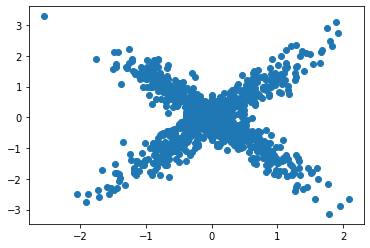

In [97]:
from sklearn.datasets import make_blobs
import numpy as np

n_samples = 500
random_state = 10
X, y = make_blobs(n_samples=n_samples, centers=[(0, 0)], random_state=random_state)
# Anisotropically distributed data
transformation1 = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
transformation2 = [[0.60834549, 0.63667341], [0.40887718, 0.85253229]]
anis1 = np.dot(X, transformation1)
anis2 = np.dot(X, transformation2)
d = np.vstack([anis1, anis2])

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

plt.scatter(d[:,0], d[:,1])
plt.show()